In [6]:
import json
import sys
import string
import nltk
import goose
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import shlex, subprocess

In [3]:
# Total number of data entry in one file
with open('2015_04_12_17_15_19.json') as file: 
    for i, l in enumerate(file):
        pass
    print i+1
    file.close()

32089


In [25]:
# Initialize a list of mentioned in tweets
mentions = []
count = []

tags = []
count_tag = []

locations = []
count_location = []

users = []
count_user = []

fav_tweet = []
count_fav = []

with open('2015_04_12_17_15_19.json') as file:
    for i, line in enumerate(file):
    # print the structure of the data
        l = json.loads(line)
        # print json.dumps(l, indent = 4, sort_keys = True)
        try:
            # The person get mentioned
            mention = l['entities']['user_mentions'][0]['screen_name']
            # The hashtag in the tweet
            hashtag = l['entities']['hashtags'][0]['text']
            # The location of the user who tweeted
            loca = l['user']['location']
            # The name of the user
            person = l['user']['screen_name']
            # The user's description
            description = l['user']['description']
            # The most re-tweeted tweet by the majority
            tweet = l['retweeted_status']['text']
        except:
            mention = ''
            hashtag = ''
            loca = ''
            person = ''
            description = ''
            tweet = ''
        if mention != '':
            mentions.append(mention)
        if hashtag != '':
            tags.append(hashtag)
        if loca != '':
            locations.append(loca)
        if person != '':
            users.append(person)
        if tweet != '':
            fav_tweet.append(tweet)
    
    # Counter of the most mentioned user
    count = collections.Counter(mentions).most_common(10)
    # Count of the most common hashtag
    count_tag = collections.Counter(tags).most_common(15)
    count_location = collections.Counter(locations).most_common(10)
    count_user = collections.Counter(users).most_common(10)
    count_fav = collections.Counter(fav_tweet).most_common(10)

In [26]:
# The count of the most mentioned user
count

[(u'akdahling', 194),
 (u'smrtgrls', 185),
 (u'homeschoolc8824', 171),
 (u'RandPaul', 167),
 (u'TMGijane', 160),
 (u'pari_passu', 138),
 (u'brownjenjen', 104),
 (u'gerfingerpoken', 88),
 (u'20committee', 82),
 (u'mattyglesias', 80)]

In [27]:
# The count of the most common hashtag
count_tag

[(u'WhyImNotVotingForHillary', 1440),
 (u'HillarysBigAnnouncement', 667),
 (u'HillaryClinton', 465),
 (u'Hillary2016', 280),
 (u'Hillary', 270),
 (u'ReadyForHillary', 237),
 (u'BitchesGetStuffDone', 194),
 (u'libertynothillary', 170),
 (u'StopHillary', 158),
 (u'tcot', 153),
 (u'Benghazi', 97),
 (u'WakeUpAmerica', 95),
 (u'WinterIsComing', 80),
 (u'Disclosure', 75),
 (u'Clinton', 53)]

In [28]:
# The locations where the most tweets took place
count_location

[(u'USA', 111),
 (u'WATCH THIS:', 75),
 (u'Texas', 48),
 (u'Washington, DC', 44),
 (u'New York', 43),
 (u'Colorado', 28),
 (u'New Jersey', 28),
 (u'California', 27),
 (u'Florida', 26),
 (u"Muslim Obama's AmeriKastan", 25)]

In [29]:
# The most active users
count_user

[(u'Lee4DISCLOSURE', 75),
 (u'PatVPeters', 25),
 (u'jennycreamale', 24),
 (u'4thavefreespiri', 24),
 (u'ChristiChat', 24),
 (u'UTHornsRawk', 23),
 (u'idesignwis', 22),
 (u'bluedillygal', 21),
 (u'Nikcela002', 19),
 (u'ConservativeGM', 18)]

In [30]:
# The most re-tweeted tweets by the majority
count_fav

[(u'Things that never get old. #BitchesGetStuffDone #ReadyForHillary @HillaryClinton @smrtgrls #TinaFey #AmyPoehler http://t.co/3Vp2DRTIge',
  194),
 (u'Waiting anxiously for #HillarysBigAnnouncement \U0001f601\u26a1\ufe0f\n\ncc: @HillaryClinton http://t.co/UMP4brzNdq',
  185),
 (u"RT @PolitiBunny: Guess who else won't be voting for Hillary?\n\nStevens\nDoherty\nWoods\nSmith\n\n#WhyImNotVotingForHillary #Benghazi",
  171),
 (u'Limited edition store item: "Hillary\'s hard drive" https://t.co/GAgncz0w7F #libertynothillary',
  167),
 (u'Here are 4 reasons #WhyImNotVotingForHillary\n \n"Did we survive the day?"  http://t.co/Riq8jqAsD3 http://t.co/OQkN202bct',
  149),
 (u'I want nobody named Bush or Clinton anywhere near our national politics for at least 2 generations. #WhyImNotVotingForHillary',
  82),
 (u"Hillary announces surprise bid for Lord Commander of the Night's Watch. #WinterIsComing",
  80),
 (u'\u2192 http://t.co/GxTALNQy6x Hillary Clinton #HillaryClinton Hillary Clinton Set to

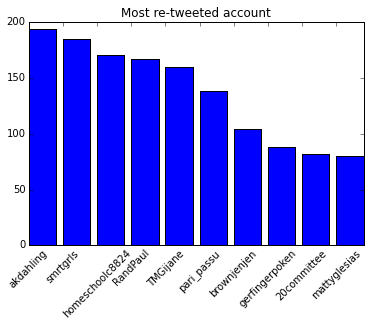

In [31]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array(zip(*count)[1])
xLabel = np.array(list(zip(*count)[0]))
plt.xticks(x, xLabel, rotation = 45)
plt.bar(x, y)
plt.title("Most re-tweeted account")
plt.show()

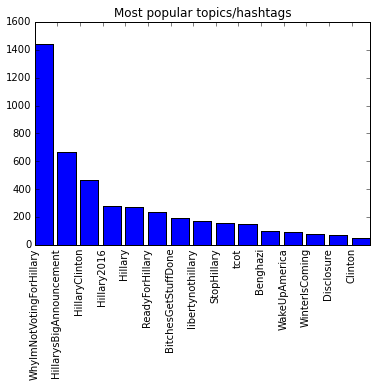

In [32]:
x_tag = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y_tag = np.array(zip(*count_tag)[1])
x_tag_Label = np.array(list(zip(*count_tag)[0]))
plt.xticks(x_tag, x_tag_Label, rotation = 90)
plt.bar(x_tag, y_tag)
plt.title("Most popular topics/hashtags")
plt.show()

In [2]:
def get_count():
    # command_line = raw_input("Please enter your command")
    command_line = 'wc -l *.json'
    p = subprocess.Popen(command_line, stdout = subprocess.PIPE, stderr=subprocess.PIPE, shell='True')
    stdout, stderr = p.communicate()
    # print stdout, type(stdout)
    return stdout

In [27]:
def parse_count(stdout):
    parsed_out = stdout.split('\n')
    total = parsed_out[-2].strip().split(' ')[0]
    print 'Total number of tweet is : %s' % (total)
    return parsed_out[:-2]

In [37]:
def analyze_count(out):
    name = []
    count = []
    for i in out:
        element = i.strip().split(' ')
        count.append(int(element[0]))
        name.append(element[1][8:13])
    x = np.array(range(len(name)))
    y = np.array(count)
    x_label = np.array(name)
    plt.xticks(x, x_label, rotation = 90)
    plt.bar(x, y)
    plt.title('Number of tweets by time series')
    plt.show()
    # plt.savefig('Number of Tweets vs Time')

Total number of tweet is : 1613955


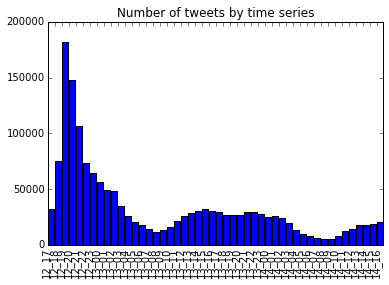

In [38]:
# Visualize the number of tweetw by hour
analyze_count(parse_count(get_count()))

In [19]:
'''with open('2015_04_12_17_15_19.json') as file:
    line = file.readline()
    l = json.loads(line)
    print json.dumps(l, indent = 4, sort_keys = True)
'''

"with open('2015_04_12_17_15_19.json') as file:\n    line = file.readline()\n    l = json.loads(line)\n    print json.dumps(l, indent = 4, sort_keys = True)\n"

# Oscar Name Count

In [3]:
names = []
counts = []

with open('/Users/Melanie/nyu/fall_2015/DSGA1003/dahlia/oscars/nameCount') as f:
    for line in f.readlines():
        n, c = line.strip().split('\t')
        names.append(n)
        counts.append(int(c))

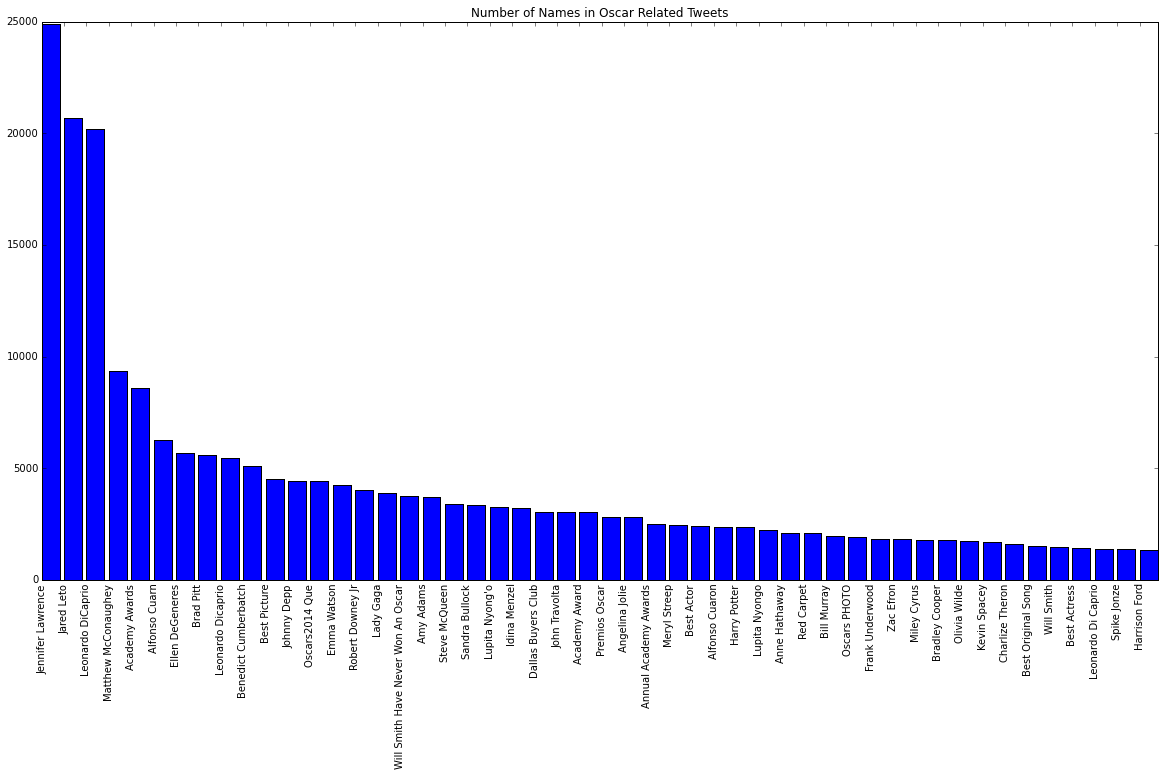

In [9]:
x = np.array(range(50))
y = np.array(counts[:50])
x_label = np.array(names[:50])
plt.figure(figsize=(20,10))
plt.xticks(x, x_label, rotation = 90)
plt.bar(x, y)
plt.title('Number of Names in Oscar Related Tweets')
plt.show()

In [10]:
names[:20]

['Jennifer Lawrence',
 'Jared Leto',
 'Leonardo DiCaprio',
 'Matthew McConaughey',
 'Academy Awards',
 'Alfonso Cuarn',
 'Ellen DeGeneres',
 'Brad Pitt',
 'Leonardo Dicaprio',
 'Benedict Cumberbatch',
 'Best Picture',
 'Johnny Depp',
 'Oscars2014 Que',
 'Emma Watson',
 'Robert Downey Jr',
 'Lady Gaga',
 'Will Smith Have Never Won An Oscar',
 'Amy Adams',
 'Steve McQueen',
 'Sandra Bullock']

In [11]:
counts[:20]

[24893,
 20693,
 20175,
 9349,
 8597,
 6244,
 5668,
 5578,
 5467,
 5102,
 4513,
 4432,
 4419,
 4248,
 4024,
 3890,
 3771,
 3703,
 3407,
 3331]